# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [2]:

iris_data = load_iris()
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

#def create_df():
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

df_iris['target'] = iris_data.target
df_iris['class'] = iris_data.target_names[iris_data.target]
df_iris.columns=['sepal length','sepal width','petal length','petal width','target','class']
#return
#create_df()    
#df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
71,6.1,2.8,4.0,1.3,1,versicolor
17,5.1,3.5,1.4,0.3,0,setosa
16,5.4,3.9,1.3,0.4,0,setosa
20,5.4,3.4,1.7,0.2,0,setosa
61,5.9,3.0,4.2,1.5,1,versicolor
116,6.5,3.0,5.5,1.8,2,virginica
144,6.7,3.3,5.7,2.5,2,virginica
139,6.9,3.1,5.4,2.1,2,virginica
22,4.6,3.6,1.0,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa


In [16]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [198]:

#From our data we will only get variable columns as np.array
x =np.array(df_iris.iloc[:,0:4])
# YOUR CODE HERE


In [215]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [216]:
samples = x
mergings = linkage(samples, method='complete')
mergings.shape

(149, 4)

In [217]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

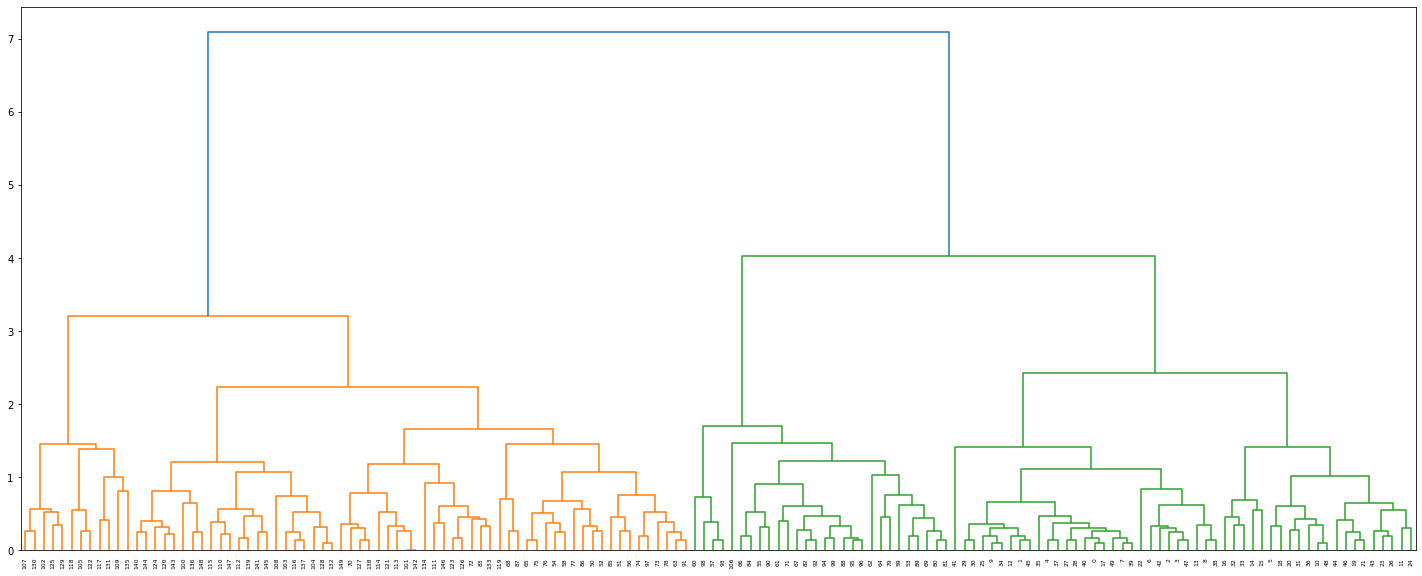

In [220]:

# YOUR CODE HERE
n= mergings.shape[0]+1
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()




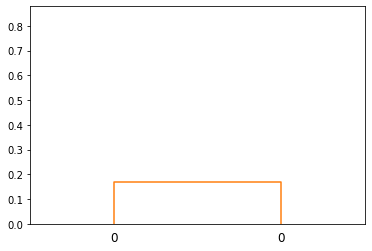

In [221]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [ ]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [51]:

model = KMeans(n_clusters = 3)
# YOUR CODE HERE


In [52]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [67]:
model.fit(points)

KMeans(n_clusters=3)


**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [ ]:
labels= model.predict(points)

In [ ]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [233]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    # YOUR CODE HERE
    for i in labels:
        if i == 0:
            data_0.append(i)
        elif i == 1:
            data_1.append(i)
        else:
            data_2.append(i)
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
    
    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(95,)
(111,)
(94,)


In [234]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

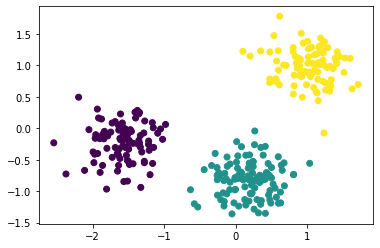

In [236]:
plt.scatter(df['0'], df['1'], c=labels, cmap='viridis')

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [148]:

# YOUR CODE HERE
new_labels= model.predict(new_points)
new_labels.shape

(100,)

In [149]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [151]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []
for points in new_labels:
        if points== 0:
            new_0.append(points)
        elif points ==1:
            new_1.append(points)
        else:
            new_2.append(points)
new_0=np.array(new_0)
new_1=np.array(new_1)
new_2=np.array(new_2)

print(new_0.shape)
print(new_1.shape)
print(new_2.shape)



(34,)
(32,)
(34,)


In [160]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

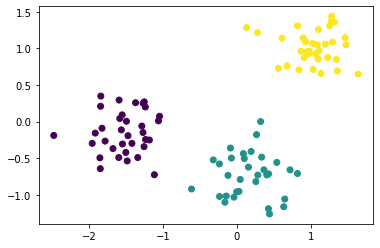

In [237]:
#plot the new labels

plt.scatter(new_df['0'], new_df['1'], c=new_labels, cmap='viridis')
# YOUR CODE HERE


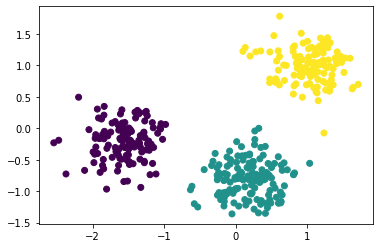

In [238]:
#plot all the points together
df2 = df + new_df
frames = [df, new_df,]
df2 = pd.concat(frames)
#print(df2)
label2 = np.concatenate((labels, new_labels), axis=0) # + new_labels
#print(type(labels))
plt.scatter(df2['0'], df2['1'], c=label2, cmap='viridis')
# YOUR CODE HERE
